# HR Analytics Project

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Importing all the necessary libraries here.

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Checking the first 5 and last 5 rows of our entire dataset. We can see that our dataset comprises of total 1470 rows and 35 columns. The column "Attrition" is our label that needs to be predicted in assisting the HR professionals to understand what causes attrition in an organization and help them with retention process. Apart from the "Attrition" column right now all the remaining columns are our features that we will be using to generate our prediction. Since our label column is based upon binary classes this becomes a Classification problem!

# Exploratory Data Analysis (EDA)

In [3]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Taking a look at all the 35 column names present in our dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 columns that have object datatype. We will need to treat the object datatype columns so that our machine learning model can understand the data since the acceptance of numerical data is mandatory.

In [5]:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


We are checking the total number of unique values present in each column be it categorical or numerical data.

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We do not have any missing values in any of our columns so we won't have to worry about handling missing data.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


With the help of decribe method in transpose format we are able to take a look at our column details clearly. The count column once again confirms that there are no missing data concern in our dataset. However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [8]:
#Mapping the attrition 1 - yes and 0 - no in the new column

df["left"] = np.where(df["Attrition"] == "Yes",1,0)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,left
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


# Visualization

In [9]:
def NumericalVariables_targetPlots(df,segment_by,target_var = "Attrition"):
    """A function for plotting the distribution of numerical variables and its effect on attrition"""

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #boxplot for comparison
    sns.boxplot(x = target_var, y = segment_by, data=df, ax=ax[0])
    ax[0].set_title("Comparision of " + segment_by + " vs " + target_var)

    #distribution plot
    ax[1].set_title("Distribution of "+segment_by)
    ax[1].set_ylabel("Frequency")
    sns.distplot(a = df[segment_by], ax=ax[1], kde=False)

    plt.show()

In [10]:
def CategoricalVariables_targetPlots(df, segment_by,invert_axis = False, target_var = "left"):

    """A function for Plotting the effect of variables(categorical data) on attrition """

    fig, ax = plt.subplots(ncols= 2, figsize = (14,6))

    #countplot for distribution along with target variable
    #invert axis variable helps to inter change the axis so that names of categories doesn't overlap
    if invert_axis == False:
        sns.countplot(x = segment_by, data=df,hue="Attrition",ax=ax[0])
    else:
        sns.countplot(y = segment_by, data=df,hue="Attrition",ax=ax[0])

    ax[0].set_title("Comparision of " + segment_by + " vs " + "Attrition")

    #plot the effect of variable on attrition
    if invert_axis == False:
        sns.barplot(x = segment_by, y = target_var ,data=df,ci=None)
    else:
        sns.barplot(y = segment_by, x = target_var ,data=df,ci=None)

    ax[1].set_title("Attrition rate by {}".format(segment_by))
    ax[1].set_ylabel("Average(Attrition)")
    plt.tight_layout()

    plt.show()

## Age

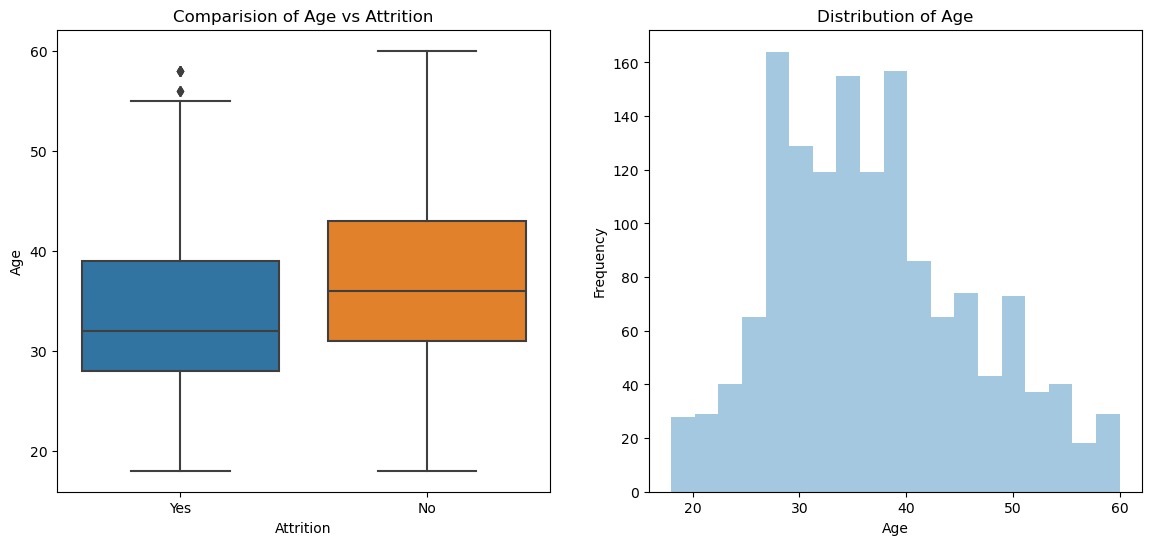

In [11]:
# we are checking the distribution of employee age and its related to attrition or not

NumericalVariables_targetPlots(df,segment_by="Age")


We found that median age of employee's in the company is 30 - 40 Yrs. Minimum age is 18 Yrs and Maximum age is 60 Yrs.

From the Age Comparision boxplot, majority of people who left the company are below 40 Yrs and among the people who didn't left the company are of age 32 to 40 years

## Daily Rate

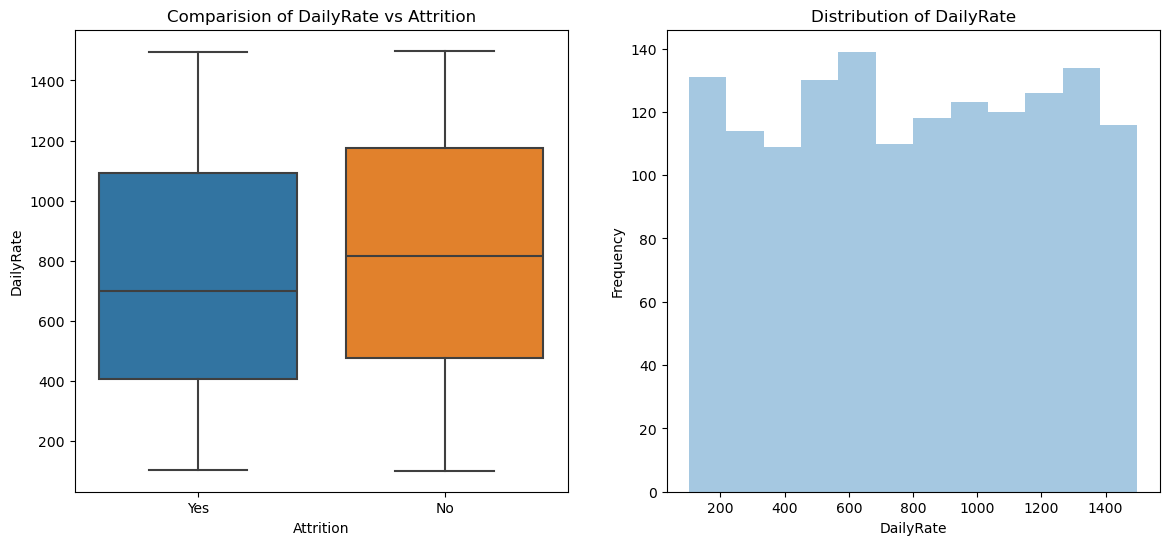

In [12]:
#Analyzing the daily wage rate vs employee left the company or not

NumericalVariables_targetPlots(df,"DailyRate")

## Montly Income

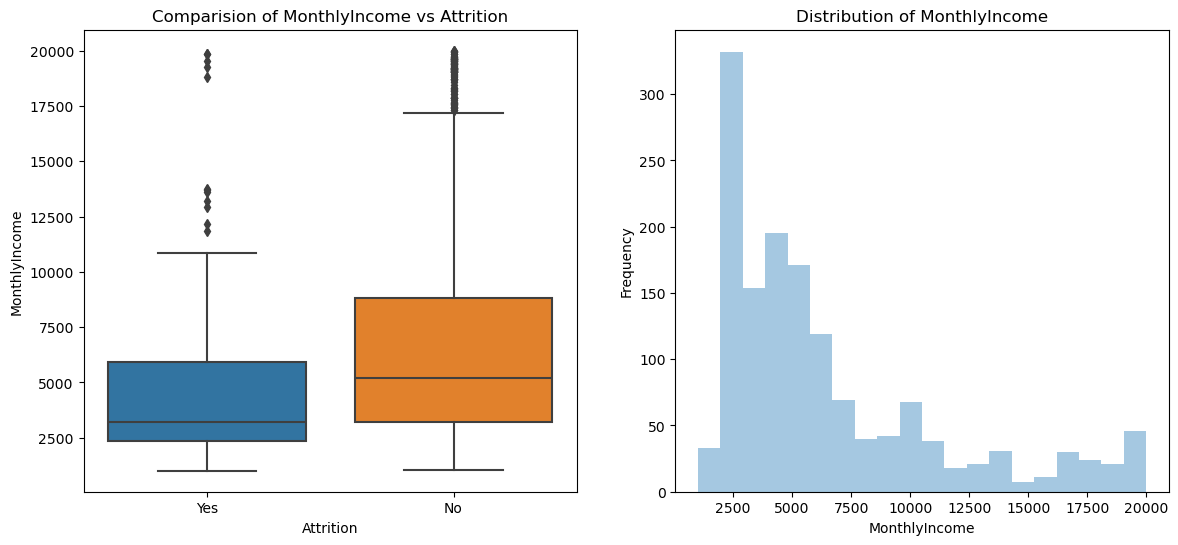

In [13]:
NumericalVariables_targetPlots(df,"MonthlyIncome")

Employee's working with lower daily rates are more prone to leave the company than compared to the employee's working with higher rates. The same trend is resonated with monthly income too.

## Hourly Rate

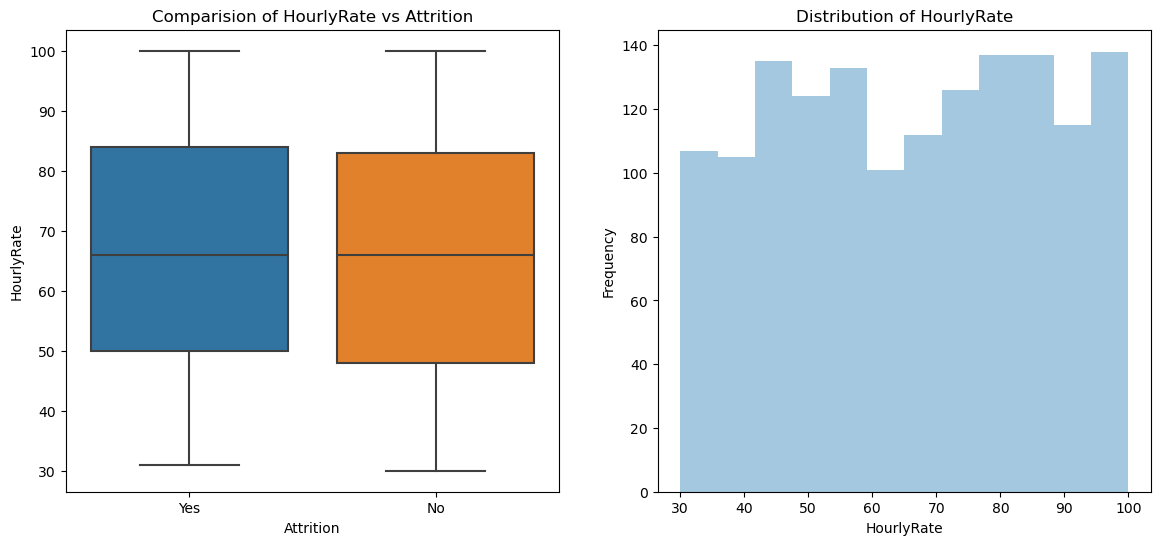

In [14]:
NumericalVariables_targetPlots(df,"HourlyRate")

From plot we have seen that there is no significant difference in the hourly rate and attrition. Therefore hourly rate is considered as not signifcant to attrition

## Percent Salary Hike

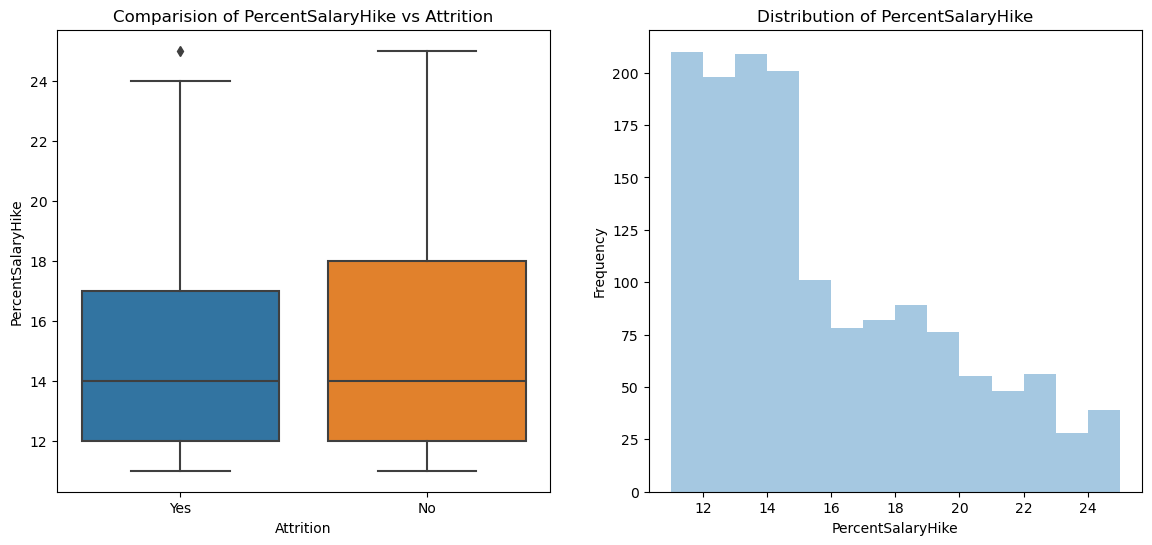

In [15]:
NumericalVariables_targetPlots(df,"PercentSalaryHike")

Majority (60% of total strength) of employee's receive 16% salary hike in the company, employee's who received less salary hike have left the company.

## Total Working years

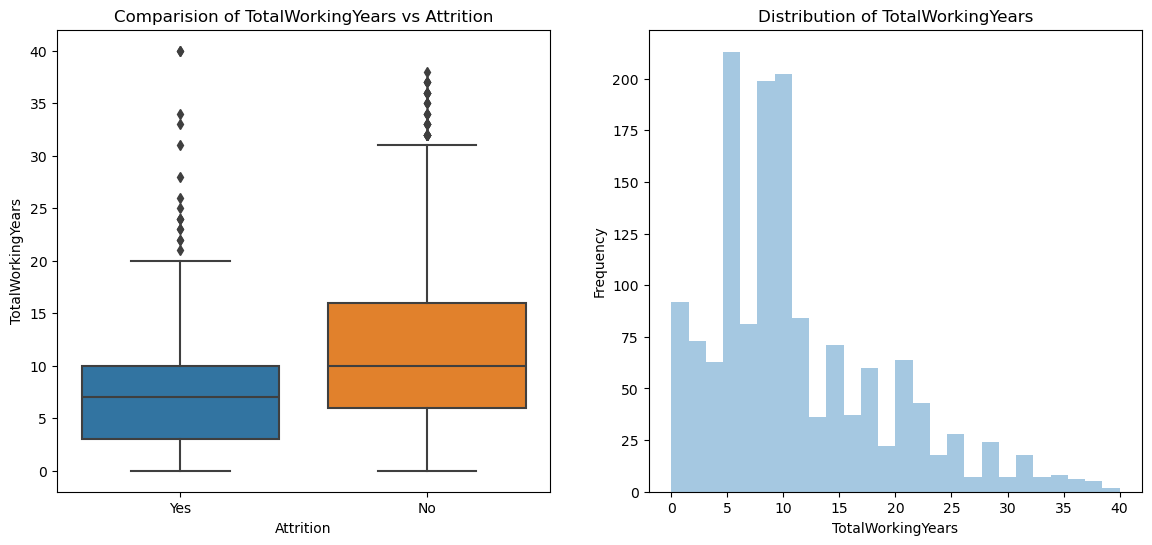

In [16]:
NumericalVariables_targetPlots(df,"TotalWorkingYears")

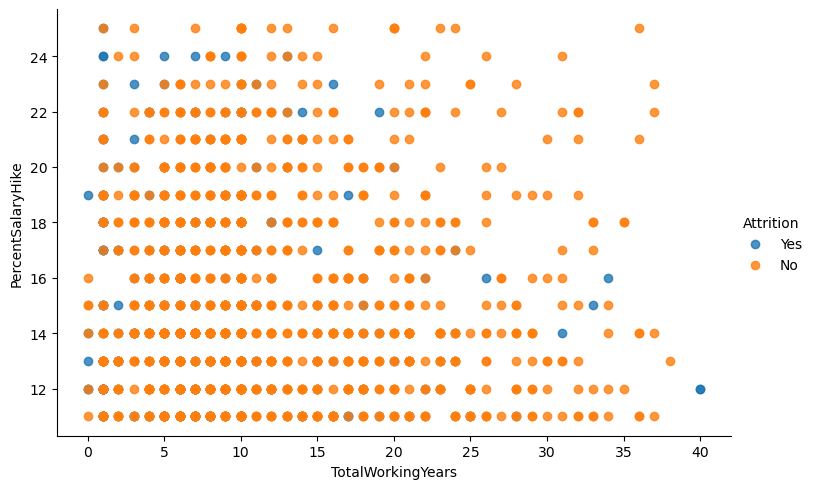

In [17]:
sns.lmplot(x = "TotalWorkingYears", y = "PercentSalaryHike", data=df, fit_reg=False, hue="Attrition",
           aspect=1.5)

plt.show()

Employee's with less working years have received 25% Salary hike when they switch to another company, but there is no linear relationship between working years and salary hike.

Attrition is not seen amomg the employee's having more than 20 years of experience if their salary hike is more than 20%, even if the salary hike is below 20% attrition rate among the employee's is very low.

Employee's with lesser years of experience are prone to leave the company in search of better pay, irrespective of salary hike

## Distance From Home

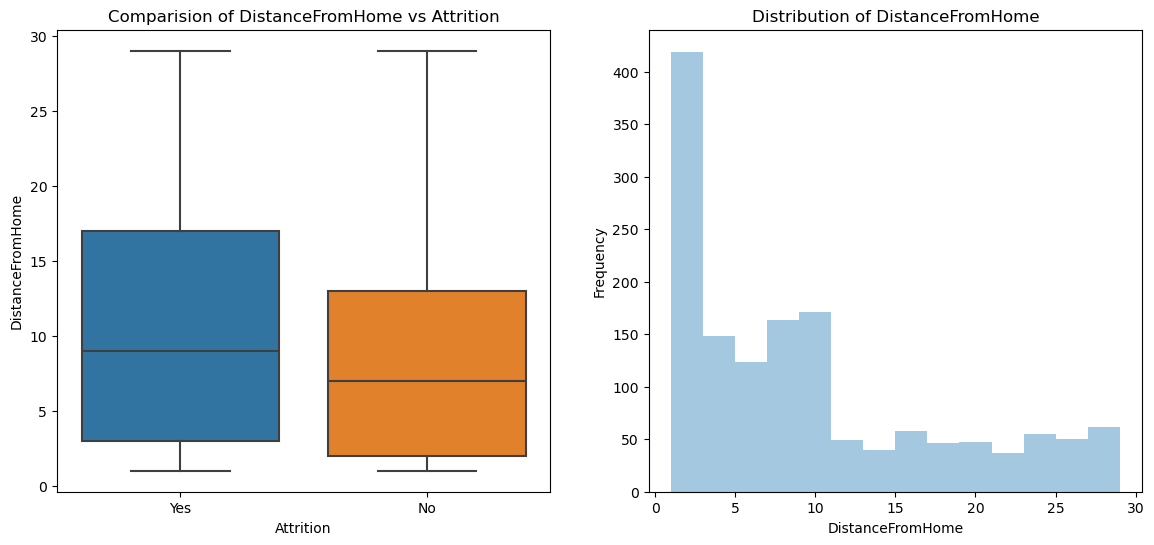

In [18]:
NumericalVariables_targetPlots(df,"DistanceFromHome")

There is a higher number of people who reside near to offices and hence the attrition levels are lower for distance less than 10. With increase in distance from home, attrition rate also increases

## Job Involvement

In [19]:
#cross tabulation between attrition and JobInvolvement
pd.crosstab(df.JobInvolvement,df.Attrition)

Attrition,No,Yes
JobInvolvement,,
1,55,28
2,304,71
3,743,125
4,131,13


In [20]:
#calculating the percentage of people having different job involvement rate
round(df.JobInvolvement.value_counts()/df.shape[0] * 100,2)

JobInvolvement
3    59.05
2    25.51
4     9.80
1     5.65
Name: count, dtype: float64

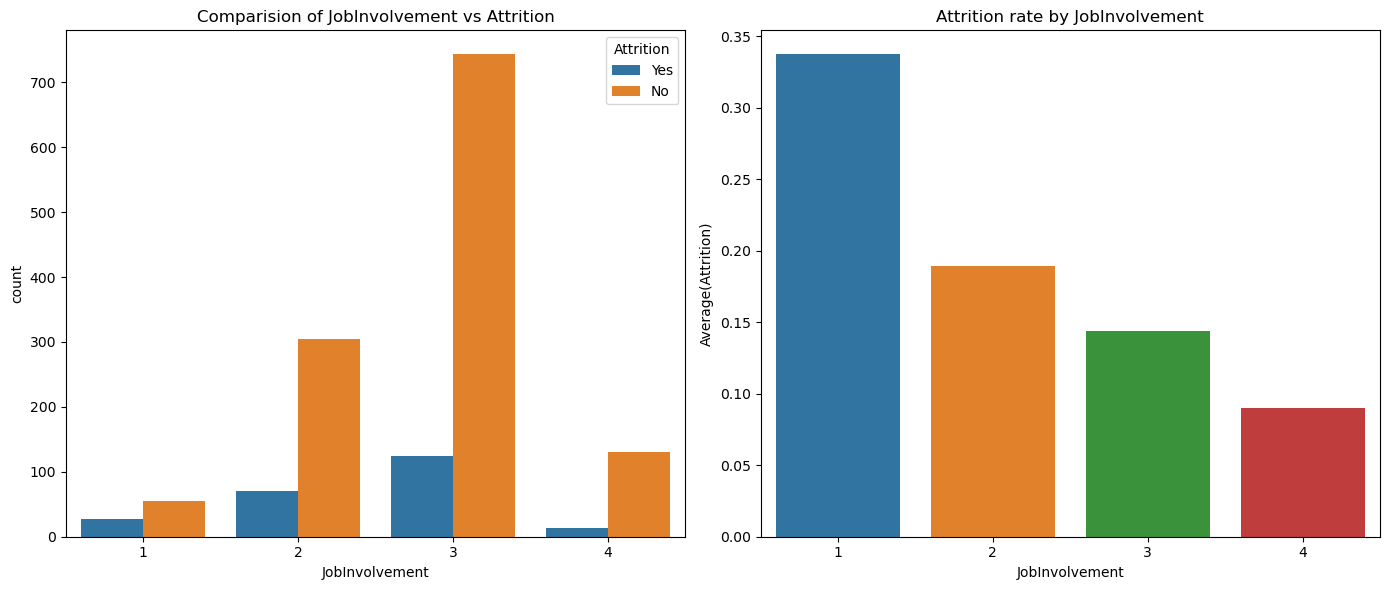

In [21]:
CategoricalVariables_targetPlots(df,"JobInvolvement")

In the total data set, 59% have high job involvement whereas 25% have medium involvement rate

From above plot we can observe that round 50% of people in low job involvement (level 1 & 2) have left the company.

Even the people who have high job involmenent have higher attrition rate around 15% in that category have left company

## JobSatisfaction

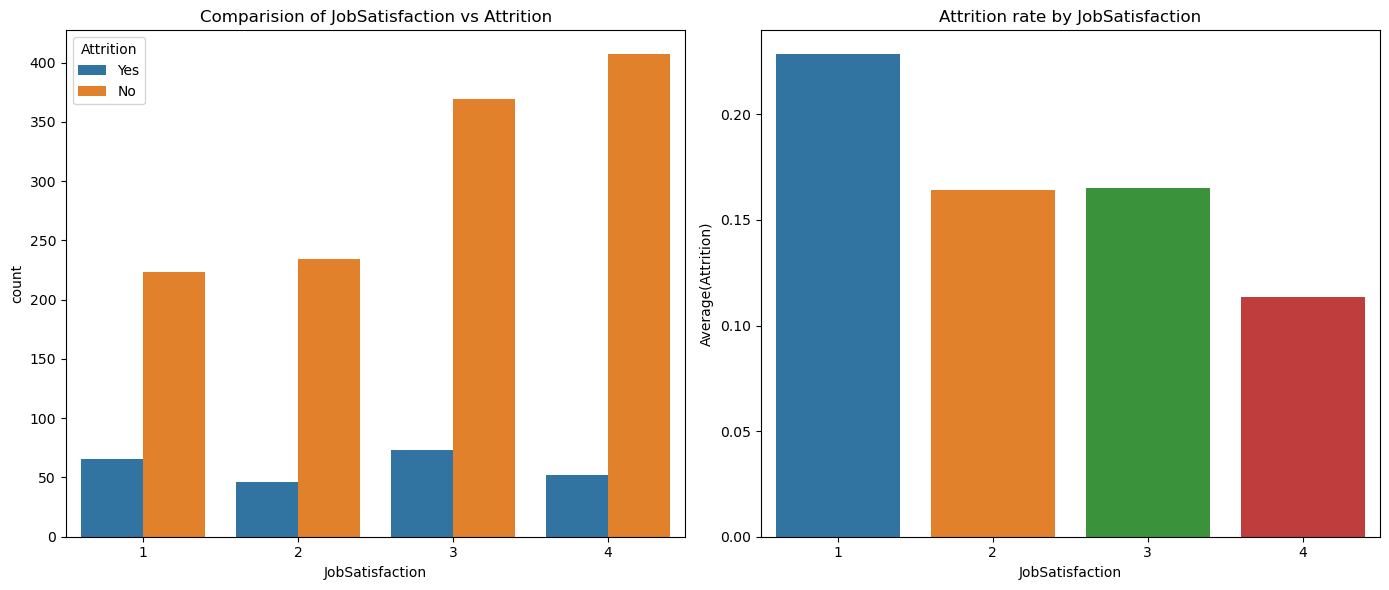

In [22]:
CategoricalVariables_targetPlots(df,"JobSatisfaction")

As expected, people with low satisfaction have left the company around 23% in that category. what surprising is out of the people who rated medium and high job satisfaction around 32% has left the company. There should be some other factor which triggers their exit from the company

## Performance Rating

In [23]:
#checking the number of categories under performance rating
df.PerformanceRating.value_counts()

PerformanceRating
3    1244
4     226
Name: count, dtype: int64

In [24]:
#calculate the percentage of performance rating per category in the whole dataset
round(df.PerformanceRating.value_counts()/df.shape[0] * 100,2)

PerformanceRating
3    84.63
4    15.37
Name: count, dtype: float64

Around 85% of people in the company rated as Excellent and remaining 15% rated as Outstanding

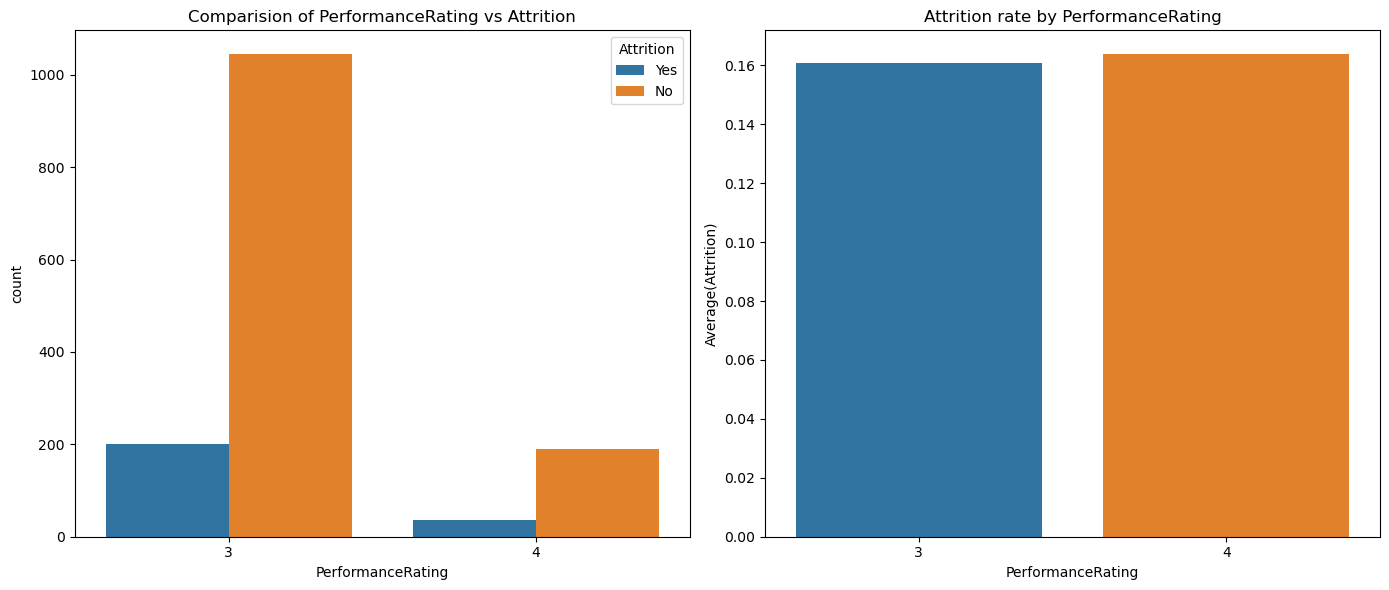

In [25]:
CategoricalVariables_targetPlots(df,"PerformanceRating")

Contrary to normal belief that employee's having higher rating will not leave the company. It may be seen that there is no significant difference between the performance rating and Attrition Rate.

## RelationshipSatisfaction

In [26]:
#percentage of each relationship satisfaction category across the data
round(df.RelationshipSatisfaction.value_counts()/df.shape[0],2)

RelationshipSatisfaction
3    0.31
4    0.29
2    0.21
1    0.19
Name: count, dtype: float64

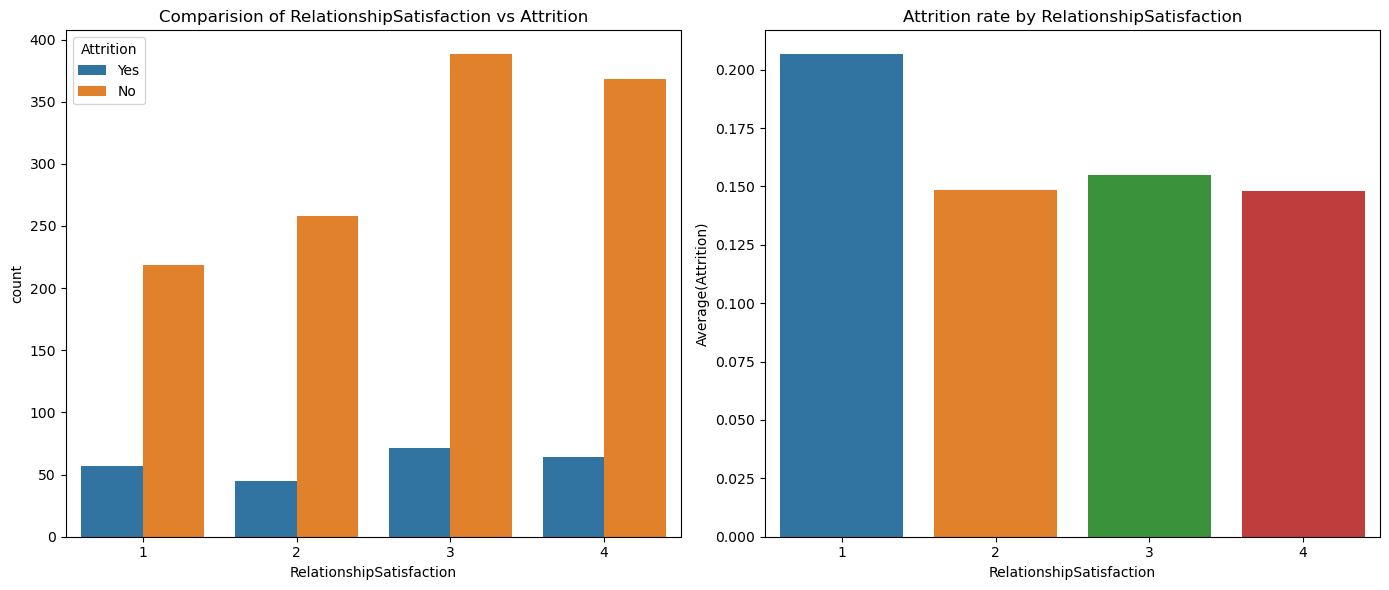

In [27]:
CategoricalVariables_targetPlots(df,"RelationshipSatisfaction")

In this too, we found that almost 30% of employees with high and very high RelationshipSatisfaction have left the company. Here also there is no visible trend among the relationshipsatisfaction and attrition rate

## WorkLifeBalance

In [28]:
#percentage of worklife balance rating across the company data
round(df.WorkLifeBalance.value_counts()/df.shape[0],2)

WorkLifeBalance
3    0.61
2    0.23
4    0.10
1    0.05
Name: count, dtype: float64

More than 60% of the employee's rated that they have Better worklife balance and 10% rated for Best worklife balance

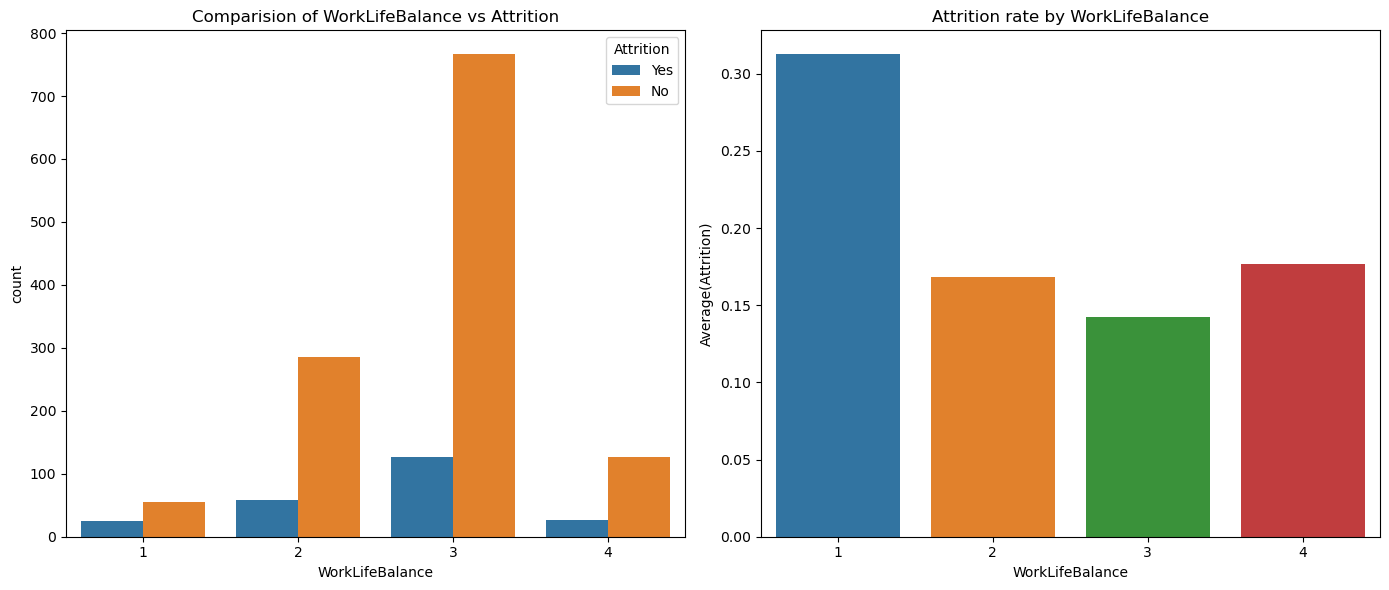

In [29]:
CategoricalVariables_targetPlots(df,"WorkLifeBalance")

As expected more than 30% of the people who rated as Bad WorkLifeBalance have left the company and around 15% of the people who rated for Best WorkLifeBalance also left the company

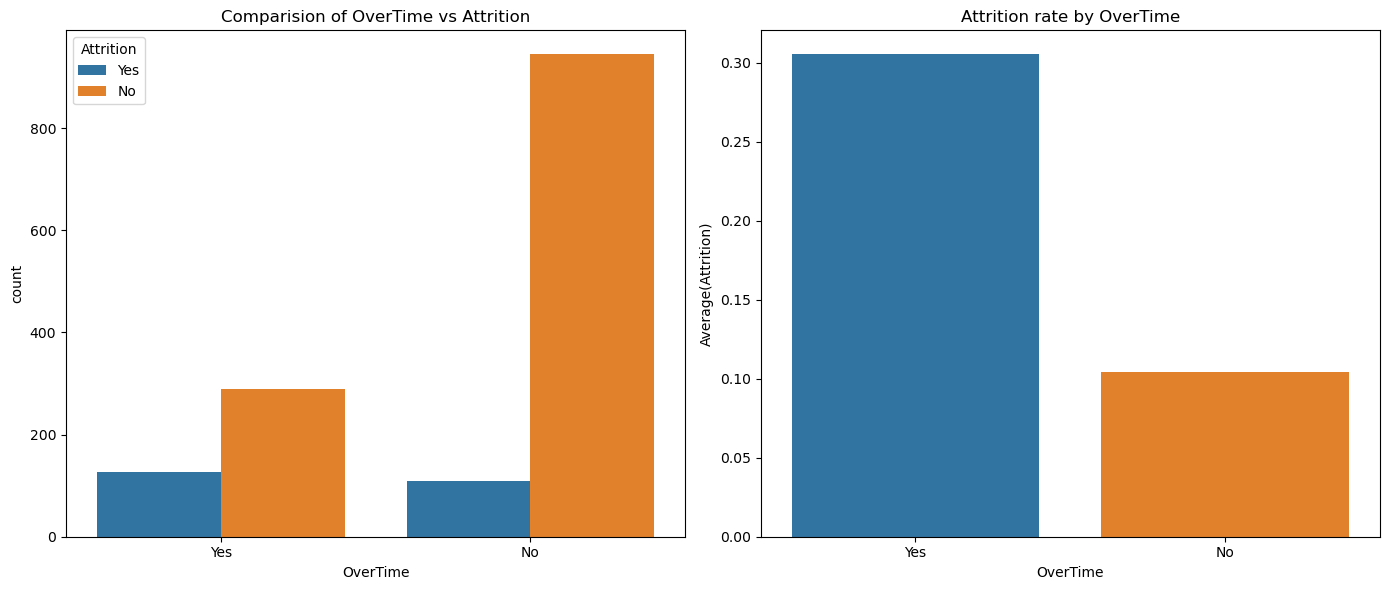

In [30]:
CategoricalVariables_targetPlots(df,"OverTime")

More than 30% of employee's who worked overtime has left the company, where as 90% of employee's who have not experienced overtime has not left the company. Therefore overtime is a strong indicator of attrition

## BusinessTravel

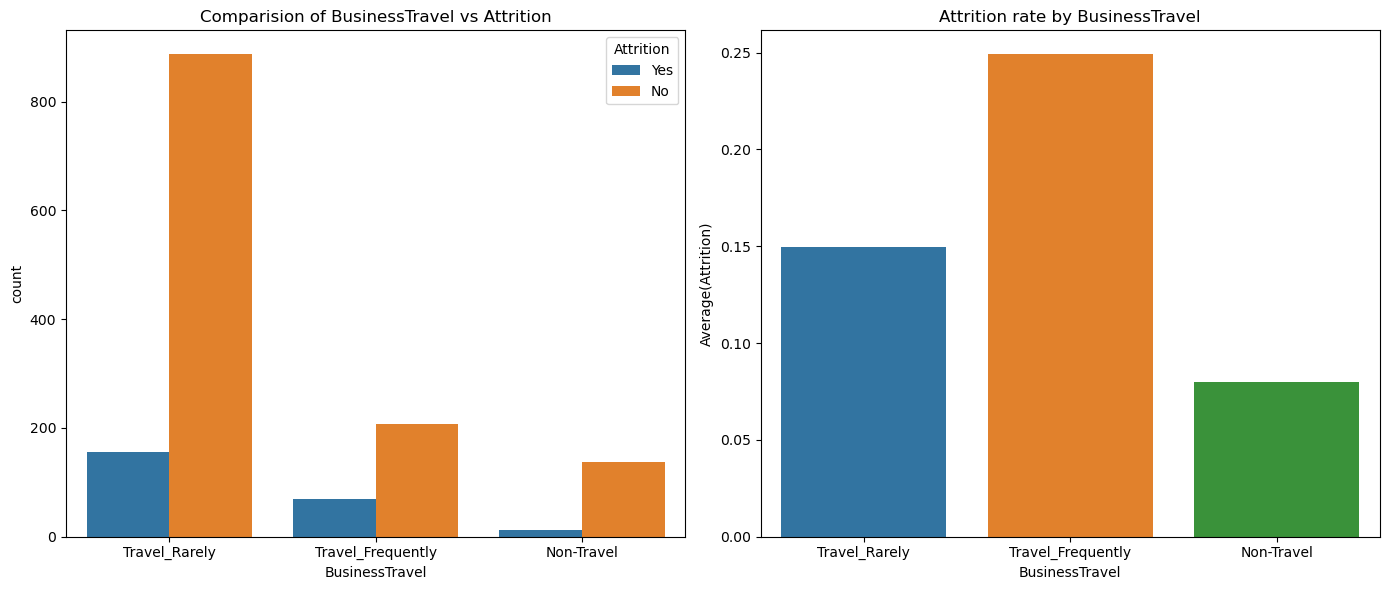

In [31]:
CategoricalVariables_targetPlots(df,segment_by="BusinessTravel")

There are more people who travel rarely compared to people who travel frequently. In case of people who travel Frequently around 25% of people have left the company and in other cases attrition rate doesn't vary significantly on travel

## Department

In [32]:
df.Department.value_counts()

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

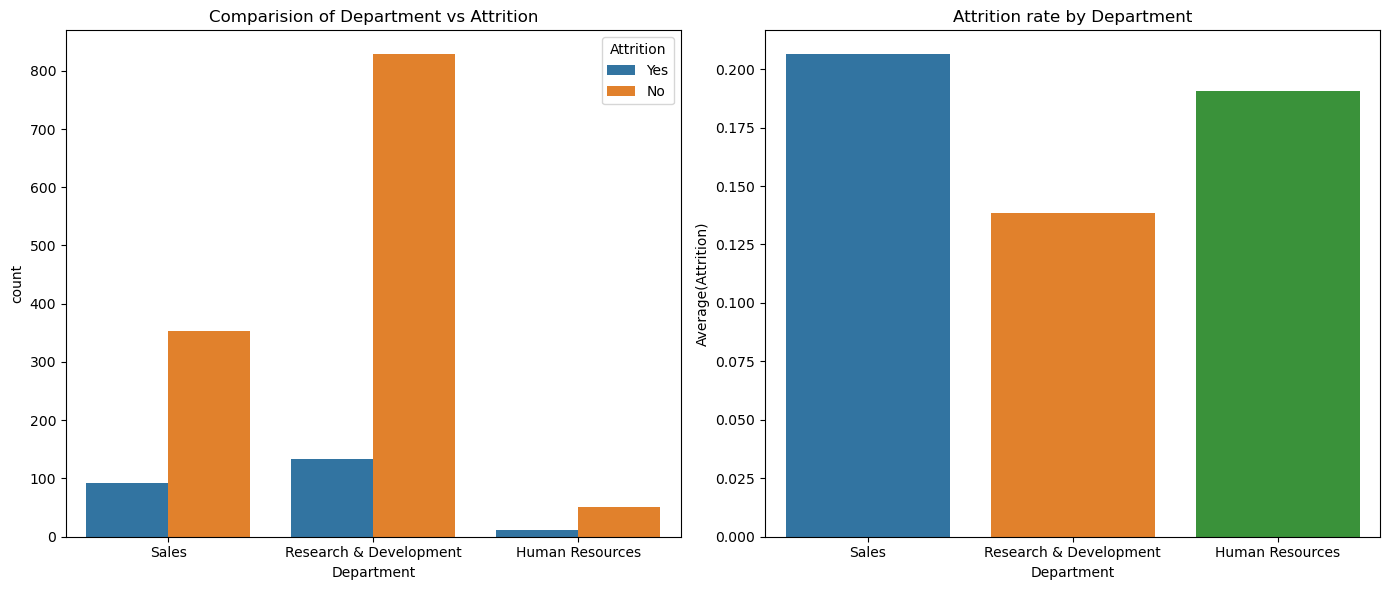

In [33]:
CategoricalVariables_targetPlots(df,segment_by="Department")

On comparing departmentwise,we can conclude that HR has seen only a marginal high in turnover rates whereas the numbers are significant in sales department with turnover rates of 39 %. The attrition levels are not appreciable in R & D where 67 % have recorded no attrition.

Sales has seen higher attrition levels about 20.6% followed by HR around 18%

## EducationField 

In [34]:
df.EducationField.value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

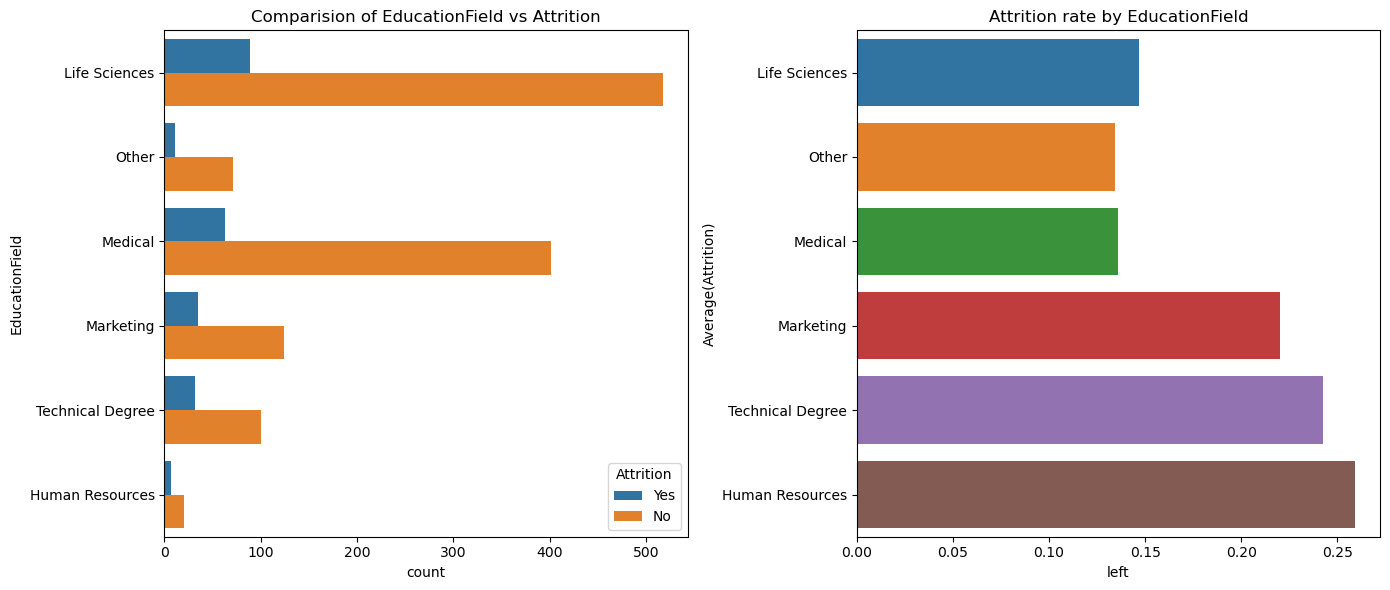

In [35]:
CategoricalVariables_targetPlots(df,"EducationField",invert_axis=True)

In [36]:
df['Education'] = df['Education'].astype(str)

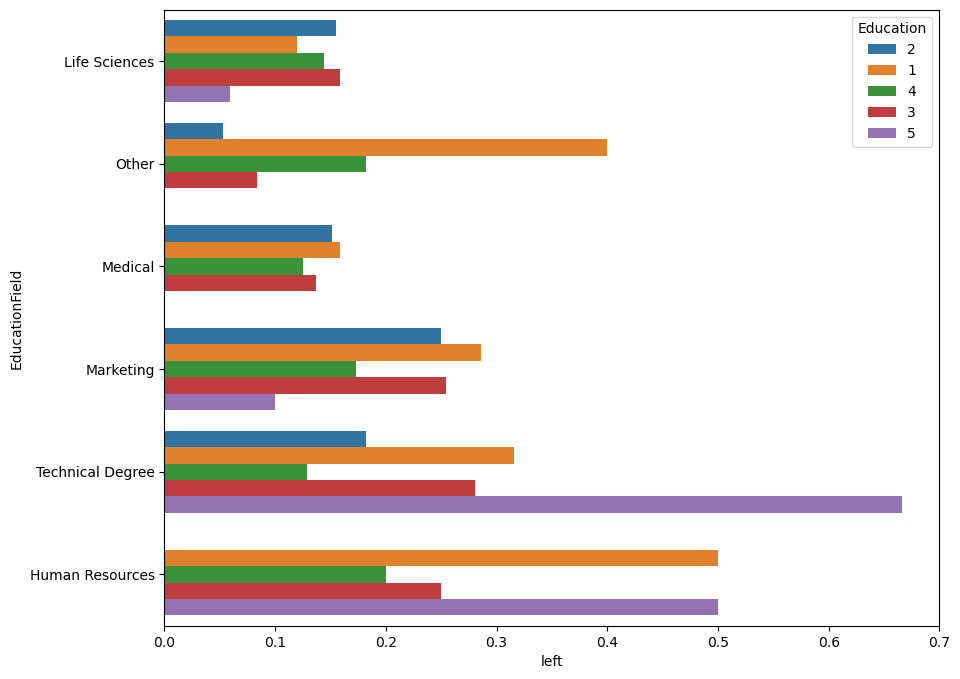

In [37]:
plt.figure(figsize=(10,8))
sns.barplot(y = "EducationField", x = "left", hue="Education", data=df,ci=None)
plt.show()

There are more people with a Life sciences followed by medical and marketing

Employee's in the EducationField of Human Resources and Technical Degree have highest attrition levels around 26% and 23% respectively

When compared with Education level, we have observed that employees in the highest level of education in there field of study have left the company. We can conclude that EducationField is a strong indicator of attrition

## EnvironmentSatisfaction

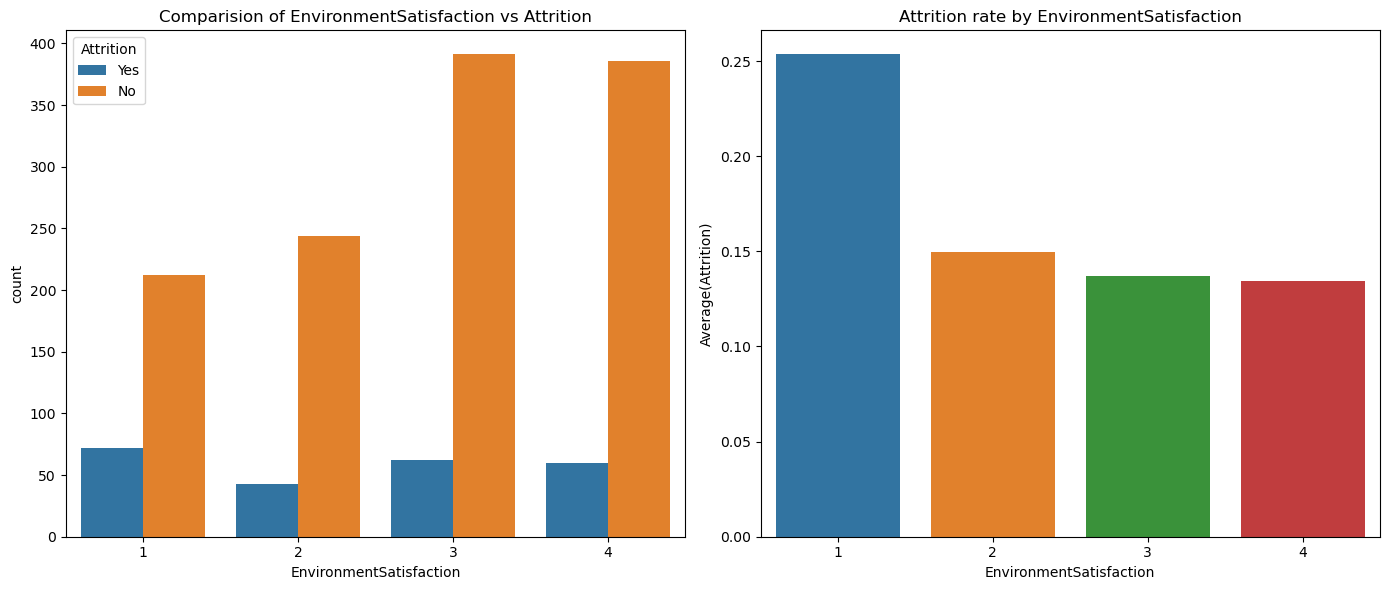

In [38]:
CategoricalVariables_targetPlots(df,"EnvironmentSatisfaction")

we can see that people having low environment satisfaction 25% leave the company

## Gender Vs Attrition

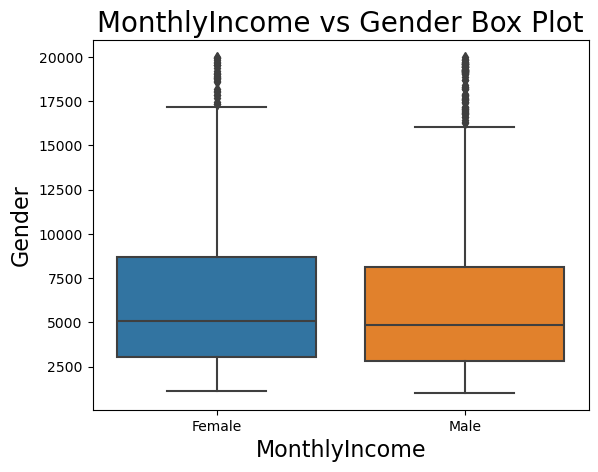

In [39]:
sns.boxplot(x = df['Gender'], y = df['MonthlyIncome'])
plt.title('MonthlyIncome vs Gender Box Plot', fontsize=20)
plt.xlabel('MonthlyIncome', fontsize=16)
plt.ylabel('Gender', fontsize=16)
plt.show()

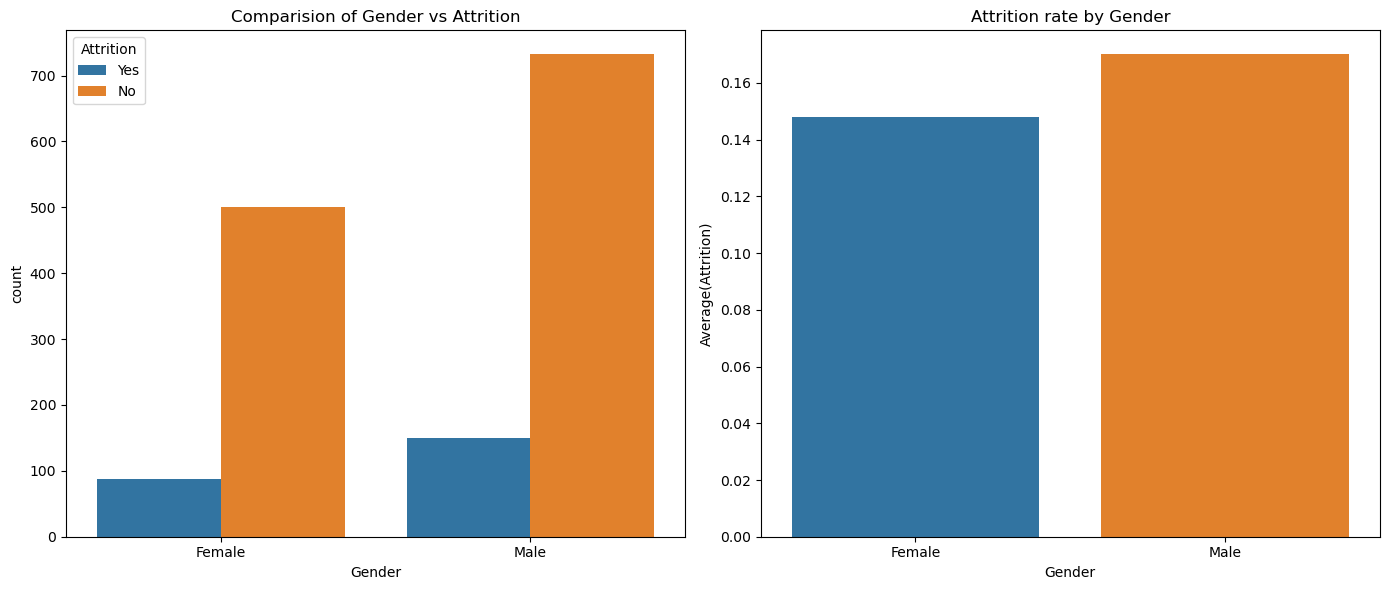

In [40]:
CategoricalVariables_targetPlots(df,"Gender")

Monthly Income distribution for Male and Female is almost similar, so the attrition rate of Male and Female is almost the same around 15%. Gender is not a strong indicator of attrition

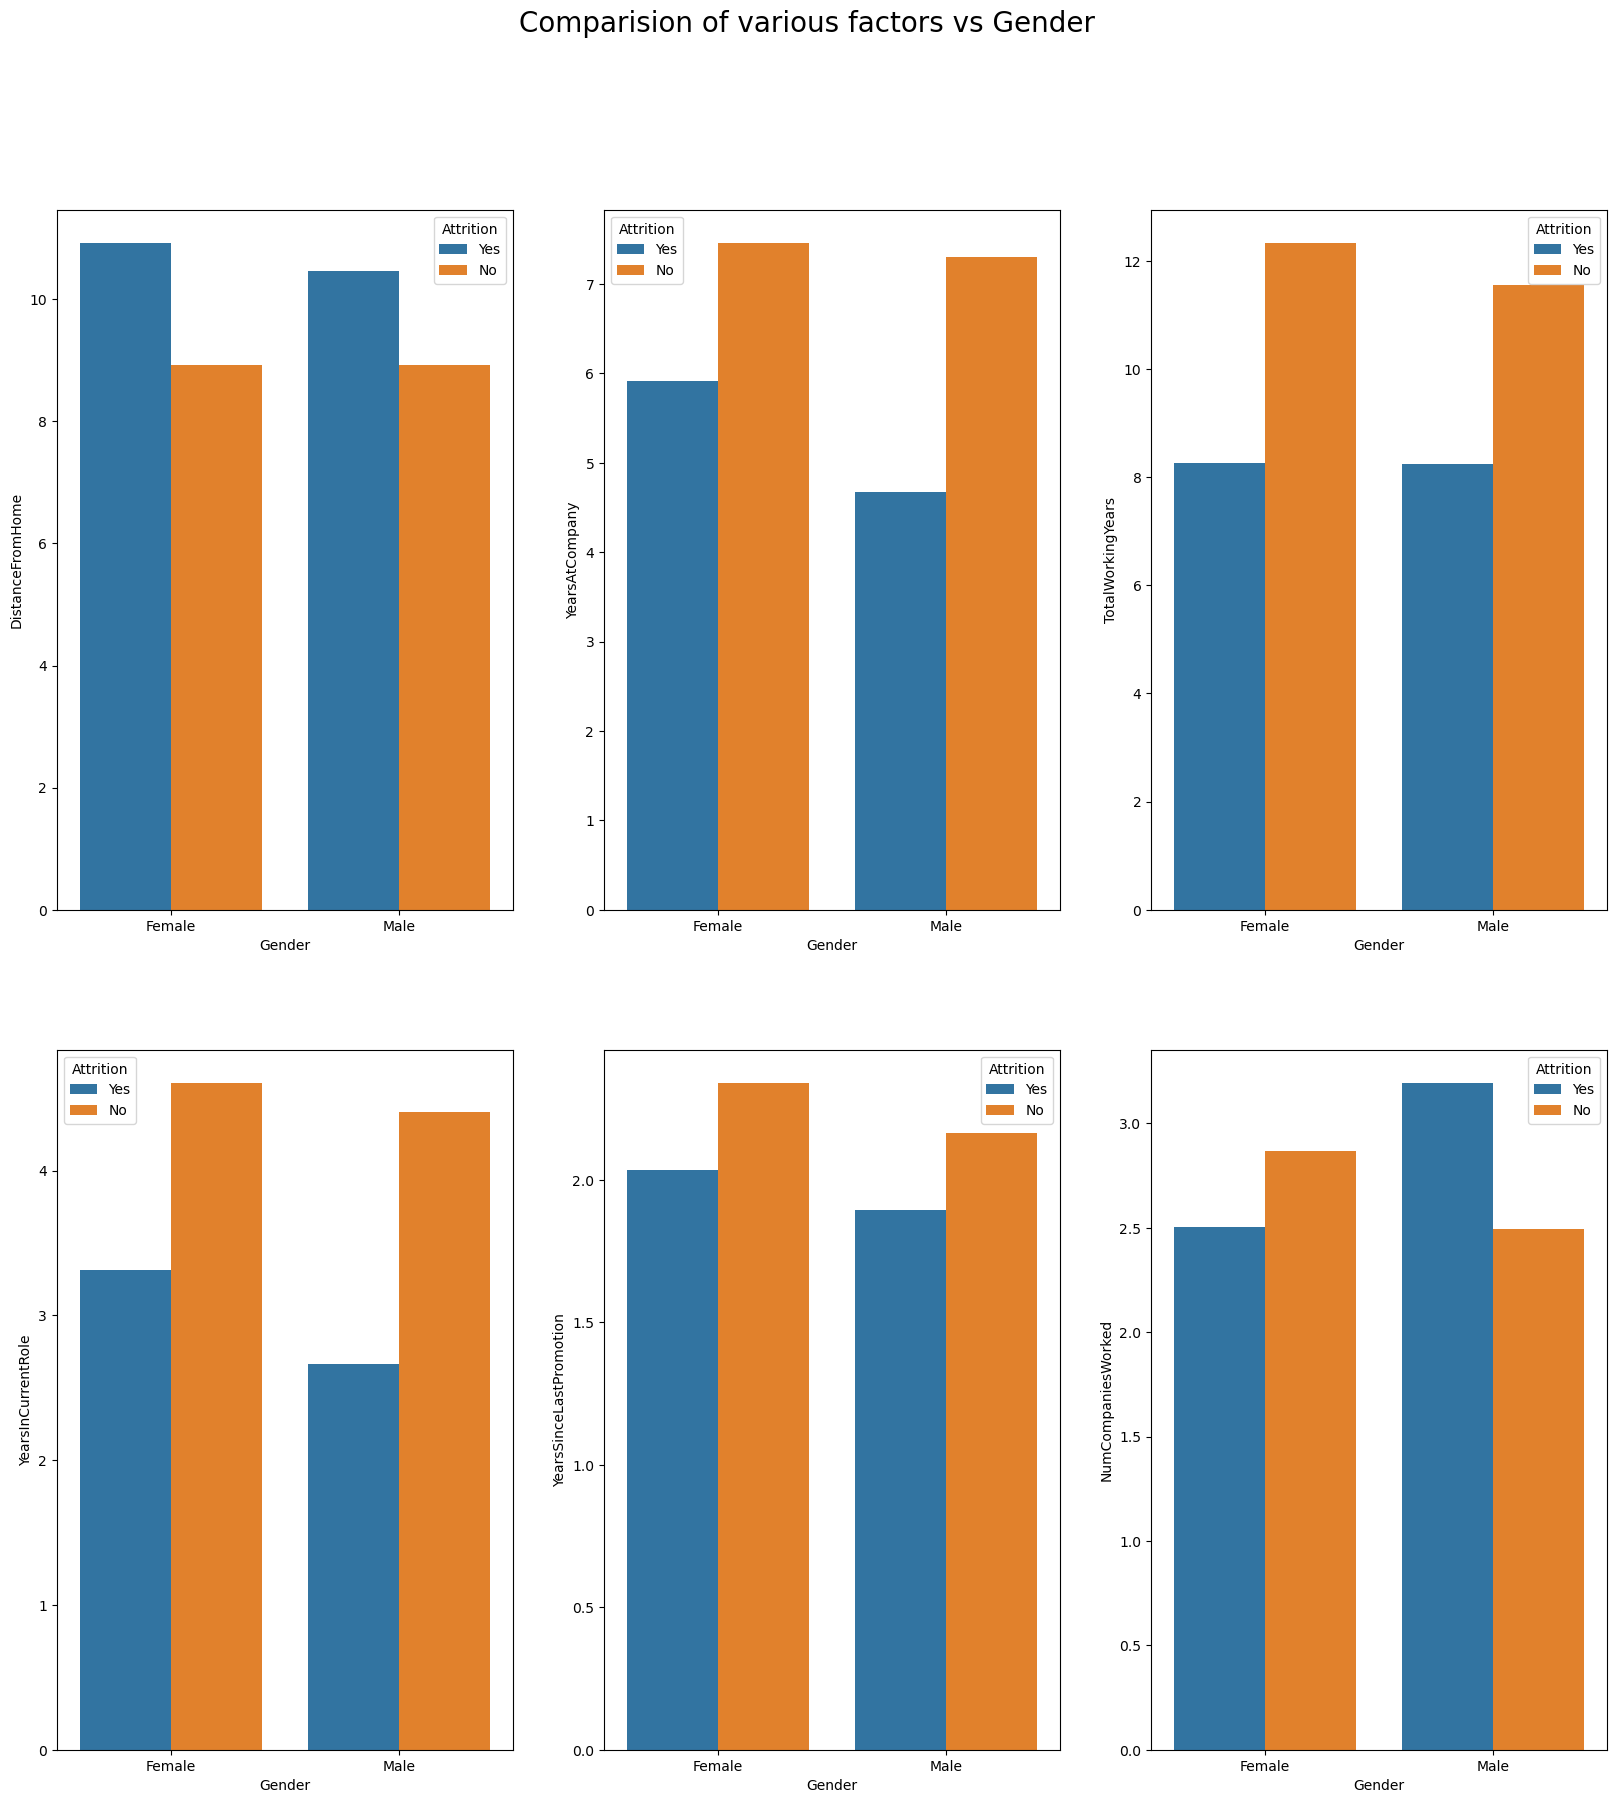

In [41]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Comparision of various factors vs Gender", fontsize=20)
sns.barplot(x = df['Gender'],y = df['DistanceFromHome'],hue = df['Attrition'], ax = ax[0,0],ci=None);
sns.barplot(x = df['Gender'],y = df['YearsAtCompany'],hue = df['Attrition'], ax = ax[0,1],ci=None);
sns.barplot(x = df['Gender'],y = df['TotalWorkingYears'],hue = df['Attrition'], ax = ax[0,2],ci=None);
sns.barplot(x = df['Gender'],y = df['YearsInCurrentRole'],hue = df['Attrition'], ax = ax[1,0],ci=None);
sns.barplot(x = df['Gender'],y = df['YearsSinceLastPromotion'],hue = df['Attrition'], ax = ax[1,1],ci=None);
sns.barplot(x = df['Gender'],y = df['NumCompaniesWorked'],hue = df['Attrition'], ax = ax[1,2],ci=None);
plt.show()

Distance from home matters to women employees more than men.

Female employes are spending more years in one company compare to their counterpart.

Female employes spending more years in current company are more inclined to switch.

## Job Role

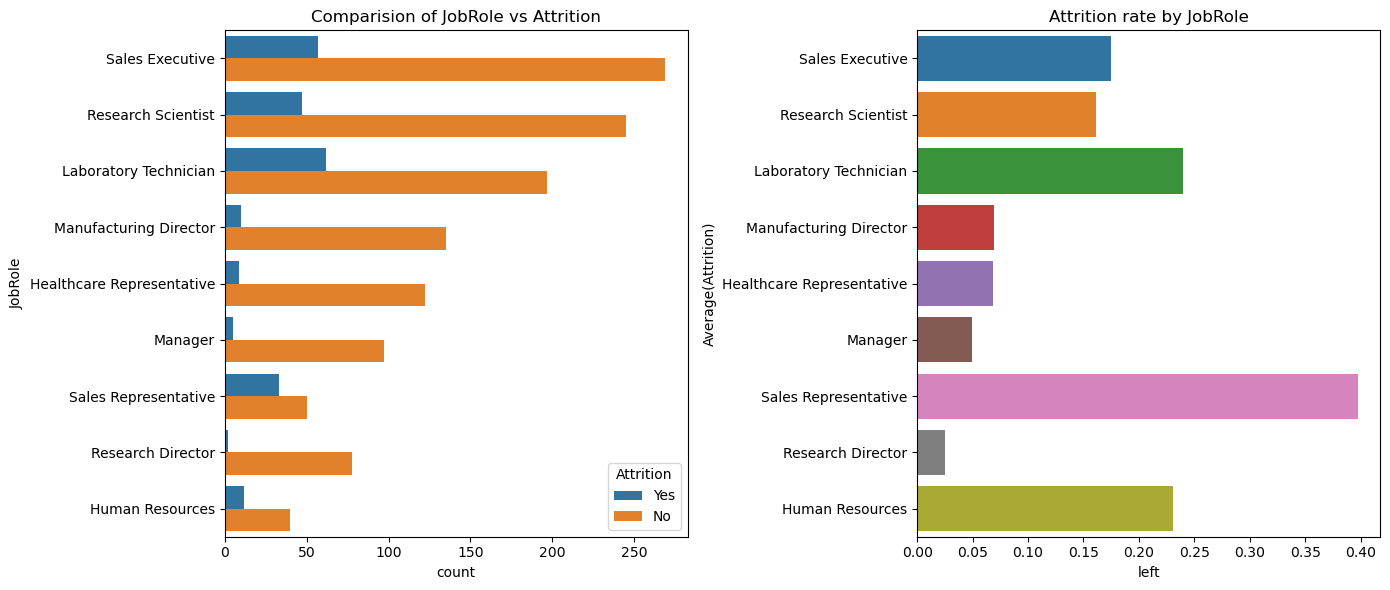

In [42]:
CategoricalVariables_targetPlots(df,"JobRole",invert_axis=True)

Jobs held by the employee is maximum in Sales Executive, then R&D , then Laboratory Technician

People working in Sales department is most likely quit the company followed by Laboratory Technician and Human Resources there attrition rates are 40%, 24% and 22% respectively

## Marital Status

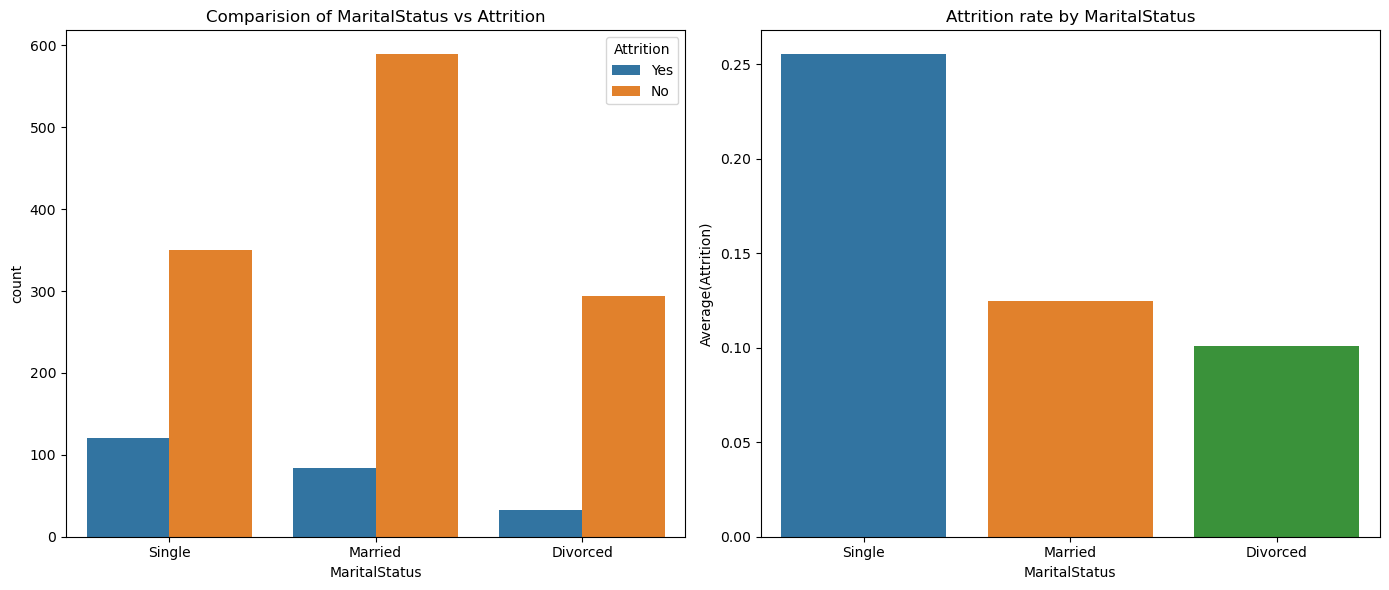

In [43]:
CategoricalVariables_targetPlots(df,"MaritalStatus")

From the plot,it is understood that irrespective of the marital status,there are large people who stay with the company and do not leave.Therefore,marital status is a weak predictor of attrition

# Building Decision Tree

In [44]:
from sklearn.model_selection import train_test_split

#for fitting classification tree
from sklearn.tree import DecisionTreeClassifier

#to create a confusion matrix
from sklearn.metrics import confusion_matrix

#import whole class of metrics
from sklearn import metrics

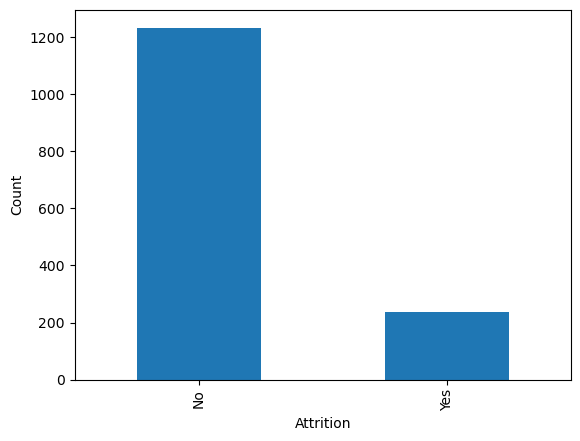

In [45]:
df.Attrition.value_counts().plot(kind = "bar")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

In [46]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

From the Exploratory data analysis, variable that are not significant to attrition are:

EmployeeCount, EmployeeNumber, Gender, HourlyRate, JobLevel, MaritalStatus, Over18, StandardHours

In [47]:
#copying the main employee data to another dataframe
df_new = df.copy()

In [48]:
#dropping the not significant variables
df_new.drop(["EmployeeCount","EmployeeNumber","Gender","HourlyRate","Over18","StandardHours","left"], axis=1,inplace=True)

## Handling Categorical Variables

1. Separate the numerical and Categorical variables

2. Convert Categorical variables to dummy variables

In [49]:
#data types of variables
dict(df_new.dtypes)

{'Age': dtype('int64'),
 'Attrition': dtype('O'),
 'BusinessTravel': dtype('O'),
 'DailyRate': dtype('int64'),
 'Department': dtype('O'),
 'DistanceFromHome': dtype('int64'),
 'Education': dtype('O'),
 'EducationField': dtype('O'),
 'EnvironmentSatisfaction': dtype('int64'),
 'JobInvolvement': dtype('int64'),
 'JobLevel': dtype('int64'),
 'JobRole': dtype('O'),
 'JobSatisfaction': dtype('int64'),
 'MaritalStatus': dtype('O'),
 'MonthlyIncome': dtype('int64'),
 'MonthlyRate': dtype('int64'),
 'NumCompaniesWorked': dtype('int64'),
 'OverTime': dtype('O'),
 'PercentSalaryHike': dtype('int64'),
 'PerformanceRating': dtype('int64'),
 'RelationshipSatisfaction': dtype('int64'),
 'StockOptionLevel': dtype('int64'),
 'TotalWorkingYears': dtype('int64'),
 'TrainingTimesLastYear': dtype('int64'),
 'WorkLifeBalance': dtype('int64'),
 'YearsAtCompany': dtype('int64'),
 'YearsInCurrentRole': dtype('int64'),
 'YearsSinceLastPromotion': dtype('int64'),
 'YearsWithCurrManager': dtype('int64')}

In [50]:
#separating the variables based on datatypes

numeric_variable_names  = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]

categorical_variable_names = [key for key in dict(df_new.dtypes) if dict(df_new.dtypes)[key] in ["object"]]


In [51]:
categorical_variable_names

['Attrition',
 'BusinessTravel',
 'Department',
 'Education',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [52]:
#store the numerical variables data in seperate dataset

df_num = df_new[numeric_variable_names]

In [53]:
#store the categorical variables data in seperate dataset

df_cat = df_new[categorical_variable_names]
#dropping the attrition
df_cat.drop(["Attrition"],axis=1,inplace=True)

In [54]:
#converting into dummy variables

df_cat = pd.get_dummies(df_cat)

In [55]:
#Merging the both numerical and categorical data

df_final = pd.concat([df_num, df_cat,df_new[["Attrition"]]],axis=1)

In [56]:
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,3,2,4,5993,19479,8,...,False,False,True,False,False,False,True,False,True,Yes
1,49,279,8,3,2,2,2,5130,24907,1,...,False,True,False,False,False,True,False,True,False,No
2,37,1373,2,4,2,1,3,2090,2396,6,...,False,False,False,False,False,False,True,False,True,Yes
3,33,1392,3,4,3,1,3,2909,23159,1,...,False,True,False,False,False,True,False,False,True,No
4,27,591,2,1,3,1,2,3468,16632,9,...,False,False,False,False,False,True,False,True,False,No


In [57]:
#final features
features =  list(df_final.columns.difference(["Attrition"]))
features

['Age',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'DailyRate',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'DistanceFromHome',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Education_1',
 'Education_2',
 'Education_3',
 'Education_4',
 'Education_5',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'JobSatisfaction',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [58]:
#seperating the target and predictors

X = df_final[features]
y = df_final[["Attrition"]]

In [59]:
X.shape

(1470, 52)

# Machine Learning Model for Classification with Evaluation Metrics

In [60]:
# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

#function for crossvalidate score
from sklearn.model_selection import cross_validate

#to find the best
from sklearn.model_selection import GridSearchCV

In [61]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify = y,random_state = 100)

In [62]:
#Checks
#Proportion in training data
y_train.Attrition.value_counts()/len(y_train)

Attrition
No     0.838678
Yes    0.161322
Name: count, dtype: float64

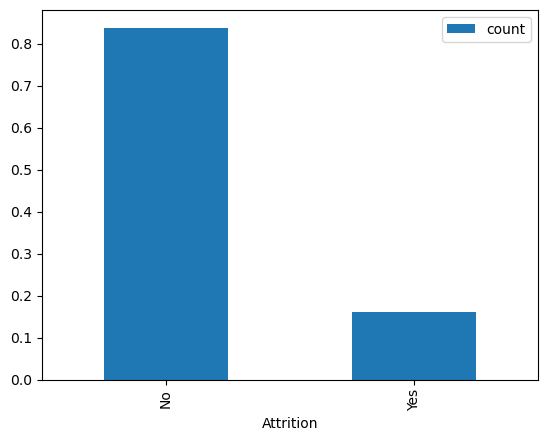

In [63]:
#Checks
#Proportion in training data
pd.DataFrame(y_train.Attrition.value_counts()/len(y_train)).plot(kind = "bar")
plt.show()

In [64]:
#Proportion of test data
y_test.Attrition.value_counts()/len(y_test)

Attrition
No     0.839002
Yes    0.160998
Name: count, dtype: float64

In [65]:
#make a pipeline for decision tree model

pipelines = {
    "clf": make_pipeline(DecisionTreeClassifier(max_depth=3,random_state=100))
}

### Cross Validate

In [66]:
scores = cross_validate(pipelines['clf'], X_train, y_train,return_train_score=True)

In [67]:
scores['test_score'].mean()

0.8386881363959271

Average accuracy of pipeline with Decision Tree Classifier is 83.48%

Cross-Validation and Hyper Parameters Tuning

Cross Validation is the process of finding the best combination of parameters for the model by traning and evaluating the model for each combination of the parameters


Declare a hyper-parameters to fine tune the Decision Tree Classifier

# Hyper parameter tuning 

In [68]:
decisiontree_hyperparameters = {
    "decisiontreeclassifier__max_depth": np.arange(3,12),
    "decisiontreeclassifier__max_features": np.arange(3,10),
    "decisiontreeclassifier__min_samples_split": [2,3,4,5,6,7,8,9,10,11,12,13,14,15],
    "decisiontreeclassifier__min_samples_leaf" : np.arange(1,3)
}

In [69]:
pipelines['clf']

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=3, random_state=100))])

In [70]:
#Create a cross validation object from decision tree classifier and it's hyperparameters

clf_model = GridSearchCV(pipelines['clf'], decisiontree_hyperparameters, cv=5, n_jobs=-1)

In [71]:
#fit the model with train data
clf_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier(max_depth=3,
                                                               random_state=100))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11]),
                         'decisiontreeclassifier__max_features': array([3, 4, 5, 6, 7, 8, 9]),
                         'decisiontreeclassifier__min_samples_leaf': array([1, 2]),
                         'decisiontreeclassifier__min_samples_split': [2, 3, 4,
                                                                       5, 6, 7,
                                                                       8, 9, 10,
                                                                       11, 12,
                                                                       13, 14,
                                                                       15]})

In [72]:
#Display the best parameters for Decision Tree Model
clf_model.best_params_

{'decisiontreeclassifier__max_depth': 3,
 'decisiontreeclassifier__max_features': 9,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [73]:
#Display the best score for the fitted model
clf_model.best_score_

0.8571394743073645

In [74]:
#In Pipeline we can use the string names to get the decisiontreeclassifer

clf_model.best_estimator_.named_steps['decisiontreeclassifier']

DecisionTreeClassifier(max_depth=3, max_features=9, random_state=100)

In [75]:
#saving into a variable to get graph

clf_best_model = clf_model.best_estimator_.named_steps['decisiontreeclassifier']

### Model Performance Evaluation

In [76]:
#Making a dataframe of actual and predicted data from test set

tree_test_pred = pd.concat([y_test.reset_index(drop = True),pd.DataFrame(clf_model.predict(X_test))],axis=1)
tree_test_pred.columns = ["actual","predicted"]

#setting the index to original index
tree_test_pred.index = y_test.index

In [77]:
tree_test_pred.head()

,actual,predicted
34,Yes,Yes
1432,No,No
334,No,No
1068,Yes,No
736,No,No


In [78]:
#keeping only positive condition (yes for attrition)

pred_probability = pd.DataFrame(p[1] for p in clf_model.predict_proba(X_test))
pred_probability.columns = ["predicted_prob"]
pred_probability.index = y_test.index

In [79]:
tree_test_pred = pd.concat([tree_test_pred,pred_probability],axis=1)
tree_test_pred.head()

,actual,predicted,predicted_prob
34,Yes,Yes,0.606061
1432,No,No,0.078341
334,No,No,0.078341
1068,Yes,No,0.142857
736,No,No,0.143345


In [80]:
#converting the labels Yes --> 1 and No --> 0 for further operations below

tree_test_pred["actual_left"] = np.where(tree_test_pred["actual"] == "Yes",1,0)
tree_test_pred["predicted_left"] = np.where(tree_test_pred["predicted"] == "Yes",1,0)
tree_test_pred.head()

,actual,predicted,predicted_prob,actual_left,predicted_left
34,Yes,Yes,0.606061,1,1
1432,No,No,0.078341,0,0
334,No,No,0.078341,0,0
1068,Yes,No,0.142857,1,0
736,No,No,0.143345,0,0


### Confusion Matrix

In [81]:
#confusion matrix
metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,labels=["Yes","No"])

array([[ 11,  60],
       [  8, 362]], dtype=int64)

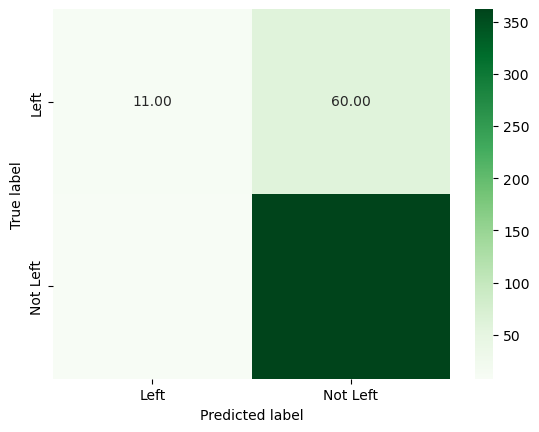

In [82]:
#confusion matrix visualization using seaborn heatmap

sns.heatmap(metrics.confusion_matrix(tree_test_pred.actual,tree_test_pred.predicted,
                                    labels=["Yes","No"]),cmap="Greens",annot=True,fmt=".2f",
           xticklabels = ["Left", "Not Left"] , yticklabels = ["Left", "Not Left"])

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

The confusion matrix is a way of tabulating the number of misclassifications, i.e., the number of predicted classes which ended up in a wrong classification bin based on the true classes.

In [83]:
#Area Under ROC Curve

auc_score_test = metrics.roc_auc_score(tree_test_pred.actual_left,tree_test_pred.predicted_left)
print("AUROC Score:",round(auc_score_test,4))

AUROC Score: 0.5667


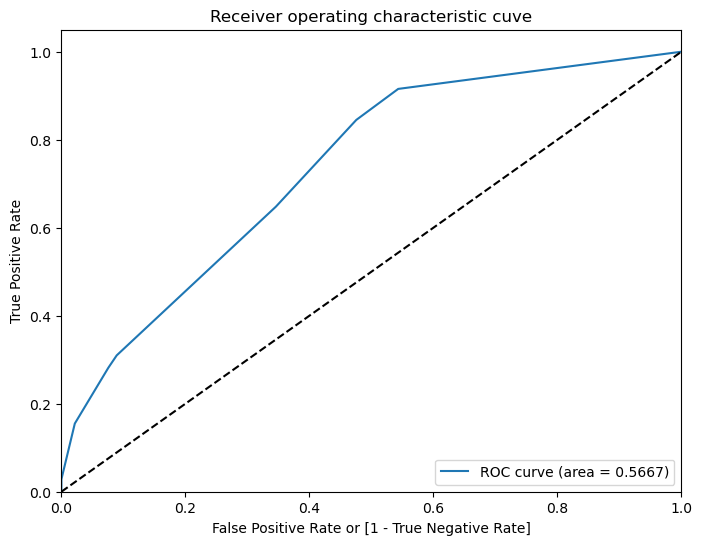

In [84]:
##Plotting the ROC Curve

fpr, tpr, thresholds = metrics.roc_curve(tree_test_pred.actual_left, tree_test_pred.predicted_prob,drop_intermediate=False)


plt.figure(figsize=(8, 6))
plt.plot( fpr, tpr, label='ROC curve (area = %0.4f)' % auc_score_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic cuve')
plt.legend(loc="lower right")
plt.show()


From the ROC Curve, we have a choice to make depending on the value we place on true positive and tolerance for false positive rate

If we wish to find the more people who are leaving, we could increase the true positive rate by adjusting the probability cutoff for classification. However by doing so would also increase the false positive rate. we need to find the optimum value of cutoff for classification

In [85]:
#calculating the recall score

print("Recall Score:",round(metrics.recall_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))
#calculating the precision score

print("Precision Score:",round(metrics.precision_score(tree_test_pred.actual_left,tree_test_pred.predicted_left) * 100,3))

Recall Score: 15.493
Precision Score: 57.895


In [86]:
print(metrics.classification_report(tree_test_pred.actual_left,tree_test_pred.predicted_left))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91       370
           1       0.58      0.15      0.24        71

    accuracy                           0.85       441
   macro avg       0.72      0.57      0.58       441
weighted avg       0.81      0.85      0.81       441



Metrics

Recall: Ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized

Precision: To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive
